# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


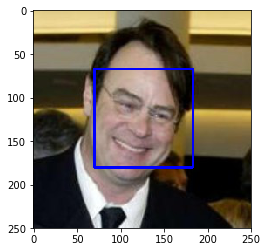

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
98% of the human images were detected as there's a face in that images, however in the dog images there was a 17%.

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_faces_detection_in_humans = [face_detector(face) for face in tqdm(human_files_short, desc="Detecting faces in Humans photos")]
human_faces_detection_in_dogs = [face_detector(face) for face in tqdm(dog_files_short, desc="Detecting faces in Humans photos")]

print("{0:.2f}% of humans correctly classified.".format(100 *(sum(human_faces_detection_in_humans)/ len(human_faces_detection_in_humans))))
print("{0:.2f}% of dogs incorrectly classified.".format(100 *(sum(human_faces_detection_in_dogs)/ len(human_faces_detection_in_dogs))))

Detecting faces in Humans photos: 100%|██████████| 100/100 [00:29<00:00,  3.35it/s]

98.00% of humans correctly classified.
17.00% of dogs incorrectly classified.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:11<00:00, 46158326.74it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    ## Importing the image from image_path in PIL format
    img = Image.open(img_path)
    
    ## Normalize the image
    ## Using the example from the Pytorch Documentation
    normalize = transforms.Normalize(mean=(0.485, 0.456, 0.406),
                                     std=(0.229, 0.224, 0.225))
    
    ## Defining the transformations of the image
    preprocess = transforms.Compose([
                                     transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     normalize])
    
    ## Preprocessing image to 4D tensor
    img_tensor = preprocess(img).unsqueeze_(0)
    
    ## Use CUDA if it's available
    if use_cuda:
        img_tensor = img_tensor.cuda()
    
    ## Evaluation step
    VGG16.eval()
    
    ## Get the prediction
    with torch.no_grad():
        output = VGG16(img_tensor)
        prediction = torch.argmax(output).item()
        
    ## Training STEP
    VGG16.train()
    
    return prediction # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    prediction = VGG16_predict(img_path)
    return True if 151 <= prediction <= 268 else False # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
Using the pre-trained VGG16 model **0%** of the short human images have a detected dog, however in the short dog images all of them (**100%**) have a detected dog. That was really cool!

In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

dogs_in_human_files_VGG16 = [dog_detector(file) for file in tqdm(human_files_short, desc="Detecting dog faces in Humans photos")]
dogs_in_dog_files_VGG16 = [dog_detector(file) for file in tqdm(dog_files_short, desc="Detecting dog faces in Dog photos")]


print("With VGG16:")
print("{0:.2f}% of Humans were detected as dogs.".format(100 *(sum(dogs_in_human_files_VGG16)/ len(dogs_in_human_files_VGG16))))
print("{0:.2f}% of Dogs were detected as dogs.".format(100 *(sum(dogs_in_dog_files_VGG16)/ len(dogs_in_dog_files_VGG16))))

Detecting dog faces in Dog photos: 100%|██████████| 100/100 [00:04<00:00, 25.43it/s]

With VGG16:
0.00% of Humans were detected as dogs.
100.00% of Dogs were detected as dogs.


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

### ResNet50

In [10]:
# define ResNet50 model
ResNet50 = models.resnet50(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    ResNet50 = ResNet50.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:06<00:00, 16855566.73it/s]


In [11]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

def ResNet50_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    ## Importing the image from image_path in PIL format
    img = Image.open(img_path)
    
    ## Normalize the image
    normalize = transforms.Normalize(mean=(0.485, 0.456, 0.406),
                                     std=(0.229, 0.224, 0.225))
    
    ## Defining the transformations of the image
    preprocess = transforms.Compose([
                                     transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     normalize])
    
    ## Preprocessing image to 4D tensor
    img_tensor = preprocess(img).unsqueeze_(0)
    
    ## Use CUDA if it's available
    if use_cuda:
        img_tensor = img_tensor.cuda()
    
    ## Evaluation step
    ResNet50.eval()
    
    ## Get the prediction
    with torch.no_grad():
        output = ResNet50(img_tensor)
        prediction = torch.argmax(output).item()
        
    ## Training STEP
    ResNet50.train()
    
    return prediction # predicted class index

In [12]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector_ResNet50(img_path):
    ## TODO: Complete the function.
    prediction = ResNet50_predict(img_path)
    return True if 151 <= prediction <= 268 else False # true/false

In [13]:
dogs_in_human_files_ResNet50 = [dog_detector_ResNet50(file) for file in tqdm(human_files_short, desc="Detecting dog faces in Humans photos")]
dogs_in_dog_files_ResNet50 = [dog_detector_ResNet50(file) for file in tqdm(dog_files_short, desc="Detecting dog faces in Dog photos")]


print("With ResNet50:")
print("{0:.2f}% of Humans were detected as dogs.".format(100 *(sum(dogs_in_human_files_ResNet50)/ len(dogs_in_human_files_ResNet50))))
print("{0:.2f}% of Dogs were detected as dogs.".format(100 *(sum(dogs_in_dog_files_ResNet50)/ len(dogs_in_dog_files_ResNet50))))


Detecting dog faces in Dog photos: 100%|██████████| 100/100 [00:03<00:00, 27.32it/s]

With ResNet50:
0.00% of Humans were detected as dogs.
100.00% of Dogs were detected as dogs.


### InceptionV3

In [14]:
# define InceptionV3 model
InceptionV3 = models.inception_v3(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    InceptionV3 = InceptionV3.cuda()

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:01<00:00, 74455620.47it/s]


In [15]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

def InceptionV3_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    ## Importing the image from image_path in PIL format
    img = Image.open(img_path)
    
    ## Normalize the image
    normalize = transforms.Normalize(mean=(0.485, 0.456, 0.406),
                                     std=(0.229, 0.224, 0.225))
    
    ## Defining the transformations of the image
    ## In InceptionV3 the input size should be 299
    preprocess = transforms.Compose([
                                     transforms.Resize(310),
                                     transforms.CenterCrop(299),
                                     transforms.ToTensor(),
                                     normalize])
    
    ## Preprocessing image to 4D tensor
    img_tensor = preprocess(img).unsqueeze_(0)
    
    ## Use CUDA if it's available
    if use_cuda:
        img_tensor = img_tensor.cuda()
    
    ## Evaluation step
    InceptionV3.eval()
    
    ## Get the prediction
    with torch.no_grad():
        output = InceptionV3(img_tensor)
        prediction = torch.argmax(output).item()
        
    ## Training STEP
    InceptionV3.train()
    
    return prediction # predicted class index

In [16]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector_InceptionV3(img_path):
    ## TODO: Complete the function.
    prediction = InceptionV3_predict(img_path)
    return True if 151 <= prediction <= 268 else False # true/false

In [17]:
dogs_in_human_files_InceptionV3 = [dog_detector_InceptionV3(file) for file in tqdm(human_files_short, desc="Detecting dog faces in Humans photos")]
dogs_in_dog_files_InceptionV3 = [dog_detector_InceptionV3(file) for file in tqdm(dog_files_short, desc="Detecting dog faces in Dog photos")]


print("With InceptionV3:")
print("{0:.2f}% of Humans were detected as dogs.".format(100 *(sum(dogs_in_human_files_InceptionV3)/ len(dogs_in_human_files_InceptionV3))))
print("{0:.2f}% of Dogs were detected as dogs.".format(100 *(sum(dogs_in_dog_files_InceptionV3)/ len(dogs_in_dog_files_InceptionV3))))



Detecting dog faces in Dog photos: 100%|██████████| 100/100 [00:05<00:00, 19.36it/s]

With InceptionV3:
0.00% of Humans were detected as dogs.
100.00% of Dogs were detected as dogs.


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [18]:
!ls -l /data/dog_images

total 12
drwxr-xr-x 135 root root 4096 Mar 27  2017 test
drwxr-xr-x 135 root root 4096 Mar 27  2017 train
drwxr-xr-x 135 root root 4096 Mar 27  2017 valid


In [19]:
import os
from torchvision import datasets, transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes


transform_resize_param = 256
transform_crop_param = 224
dir_path = "/data/dog_images"

## Using the normalization 
train_transform = transforms.Compose([transforms.Resize(transform_resize_param),
                                       transforms.CenterCrop(transform_crop_param),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(15),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

valid_transform = transforms.Compose([transforms.Resize(transform_resize_param),
                                       transforms.CenterCrop(transform_crop_param),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transform = transforms.Compose([transforms.Resize(transform_resize_param),
                                       transforms.CenterCrop(transform_crop_param),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

#valid_test_transforms = transforms.Compose([transforms.Resize(transform_resize_param),
#                                           transforms.CenterCrop(transform_crop_param),
#                                           transforms.ToTensor(),
#                                           transforms.Normalize([0.485, 0.456, 0.406],
#                                                                [0.229, 0.224, 0.225])])

train_dataset = datasets.ImageFolder(os.path.join(dir_path, 'train'), transform=train_transform)
valid_dataset = datasets.ImageFolder(os.path.join(dir_path, 'valid'), transform=valid_transform)
test_dataset = datasets.ImageFolder(os.path.join(dir_path, 'test'), transform=test_transform)

train_loader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=32,
                                          shuffle=True,
                                          num_workers=0)

valid_loader = torch.utils.data.DataLoader(valid_dataset,
                                          batch_size=32,
                                          shuffle=True,
                                          num_workers=0)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=32,
                                          shuffle=False,
                                          num_workers=0)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- **Image resizing:**

In this opportunity, I decided to follow the guidelines from the original paper (**Very Deep Convolutional Networks for Large-Scale Image Recognition**, Simonyan K, Zisserman A 2015) where the authors chose a 224x224 px image as input tensor in the VGG16 CNN, randomly cropped from a rescaled version of the original image.


- **Data Augmentation:**

Data augmentation is an easy way to extend our dataset and improve generalization when training the model. In that sense, I add randomly horizontal and rotations for 15 degrees in order to avoid overfitting of the model.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [20]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # convolutional layer (from 224x224x3 image tensor)
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        
        # convolutional layer (from 112x112x64 image tensor)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        
        # convolutional layer (from 56x56x128 image tensor)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        
        # convolutional layer (from 28x28x3 image tensor)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        
        # convolutional layer (from 14x14x3 image tensor)
        self.conv5 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # linear layer (from 7x7x512 -> 512)
        self.fc1 = nn.Linear(7 * 7 * 512, 512)
        
        # linear layer (512 -> 256)
        self.fc2 = nn.Linear(512, 256)
        
        # linear layer (256 -> 133)
        self.fc3 = nn.Linear(256, 133)
        
        # dropout layer (p=0.5)
        self.dropout = nn.Dropout(0.5)
        
        # batch norm
        self.batch_norm1 = nn.BatchNorm1d(num_features=512)
        self.batch_norm2 = nn.BatchNorm1d(num_features=256)
    
    def forward(self, x):
        ## Define forward behavior
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        
        # flatten image input --> 7 * 7 * 512 = 25088
        x = x.view(-1, 7 * 7 * 512)
        
        x = F.relu(self.batch_norm1(self.fc1(x)))
        
        x = self.dropout(x)
        
        x = F.relu(self.batch_norm2(self.fc2(x)))
        
        x = self.dropout(x)
        
        x = self.fc3(x)
        
        return x

# takes in a module and applies the specified weight initialization
def weights_init_uniform_rule(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.uniform_(-y, y)
        m.bias.data.fill_(0)

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
model_scratch.apply(weights_init_uniform_rule)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

As in question 3, I decided to follow the guidelines from the original paper (**Very Deep Convolutional Networks for Large-Scale Image Recognition**, Simonyan K, Zisserman A 2015) for the model architecture. 

Since at least I needed to achieve a 10% test accuracy I tried to take the simplest model from the paper (Column A in the ConvNet Configuration Table 1) and further simplified it. In that sense, I decided to use 5 convolutional layers with a kernel size of 3x3 and a padding of 1, which gradually increases the number of feature maps, but keeps the size. And also between every convolutional layer, there is a maxpool layer with a 2x2 kernel and a stride of 2, that halfs the size of all feature maps. After the 5 convolutions and maxpool layers we end up with 512x7x7 feature maps.

After that, the feature maps are flattened to a vector of length 25,088 (7 x 7 x 512) and fed into the fully connected (FC) layers for classification. Based on the paper I took 3 FC layers, but reduced the number of nodes per layer as we have only 133 classes, not a 1000 as the VGG16.

It's important to mention that unlike the paper, the last layer in my network is a FC layer, not a softmax layer, and that is because for training I used CrossEntropyLoss() that combines a log-softmax output-layer activation and a negative log-likelihood loss-function. When testing the neural net, the output of the network is fed into a softmax function to obtain class probabilities.

**NEW COMMENTS**


Based on the suggestions of the reviewer, I used batch normalization for the first 2 FC layers and use a uniform distribution for weights initialization. And also, I used image segmentation only on the training set. Finally, my score improved considerably **from 11% to 30% in accuracy**!!!! Thanks a lot for that!! :D

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [21]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [22]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [23]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            ## clear gradients of all optimized variables
            optimizer.zero_grad()
            
            # forward pass
            output = model(data)
            
            # calculating batch loss
            loss = criterion(output, target)
            
            # backward pass
            loss.backward()
            
            # perform optimization step
            optimizer.step()
            
            # updating training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                output = model(data)
            
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print("Validation loss decreased from {:.4f} to {:.4f}. The model is saved!".format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


loaders_scratch = {"train": train_loader,
                   "valid": valid_loader,
                   "test": test_loader}

# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.793557 	Validation Loss: 4.615896
Validation loss decreased from inf to 4.6159. The model is saved!
Epoch: 2 	Training Loss: 4.593742 	Validation Loss: 4.555238
Validation loss decreased from 4.6159 to 4.5552. The model is saved!
Epoch: 3 	Training Loss: 4.440330 	Validation Loss: 4.825829
Epoch: 4 	Training Loss: 4.303254 	Validation Loss: 4.424752
Validation loss decreased from 4.5552 to 4.4248. The model is saved!
Epoch: 5 	Training Loss: 4.182073 	Validation Loss: 4.483140
Epoch: 6 	Training Loss: 4.070270 	Validation Loss: 4.235193
Validation loss decreased from 4.4248 to 4.2352. The model is saved!
Epoch: 7 	Training Loss: 3.943382 	Validation Loss: 3.926944
Validation loss decreased from 4.2352 to 3.9269. The model is saved!
Epoch: 8 	Training Loss: 3.822292 	Validation Loss: 3.938117
Epoch: 9 	Training Loss: 3.720272 	Validation Loss: 3.764535
Validation loss decreased from 3.9269 to 3.7645. The model is saved!
Epoch: 10 	Training Loss: 3.608604 	Vali

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [24]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.737123


Test Accuracy: 30% (259/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [25]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [26]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)
#model_transfer = models.vgg19(pretrained=True)
#model_transfer = models.resnet50(pretrained=True)

if use_cuda:
    model_transfer = model_transfer.cuda()
    
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

Well, I think that it's very efficient and practical to use pre-trained models to solve this kind of problems like image classification. Once the model is trained on the dataset, it works very well for feature detectors for images they were not trained on. 


Here I'll use transfer learning to train the VGG-16 network that can classify the dog images, and that's because this model was used with the ImageNet so I guess the feature maps will work perfectly. In order to use this pre-trained NN, I really need to change the last layer in order to classify the 133 classes. 

I have already tested VGG-16, VGG-19 and Resnet-50 on this dataset and found VGG-16 to have the best performance.

**NEW COMMENTS**


Based on the suggestions of the reviewer, I used image segmentation only on the training set. Finally, my score improved considerably **from 63% to 79% in accuracy**!!!! Thanks a lot for that!! :D

In [27]:
# this is needed for pre-trained networks
# freeze parameters so we don't backprop through them
for param in model_transfer.parameters():
    param.requires_grad = False
    
# replace the last fully connected layer with a Linnear layer with 133 out features (param_output_size)
model_transfer.classifier[6] = nn.Linear(4096, len(train_dataset.classes), bias=True)
#model_transfer.fc = nn.Linear(2048, len(train_dataset.classes), bias=True)

if use_cuda:
    model_transfer = model_transfer.cuda()
    
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [28]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(filter(lambda p: p.requires_grad,model_transfer.parameters()), lr=0.001)
#optim.Adam(filter(lambda p: p.requires_grad,model_transfer.parameters()), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [29]:
# train the model
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, 
                       criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.464541 	Validation Loss: 3.682318
Validation loss decreased from inf to 3.6823. The model is saved!
Epoch: 2 	Training Loss: 3.409318 	Validation Loss: 2.822529
Validation loss decreased from 3.6823 to 2.8225. The model is saved!
Epoch: 3 	Training Loss: 2.697372 	Validation Loss: 2.228374
Validation loss decreased from 2.8225 to 2.2284. The model is saved!
Epoch: 4 	Training Loss: 2.249590 	Validation Loss: 1.877531
Validation loss decreased from 2.2284 to 1.8775. The model is saved!
Epoch: 5 	Training Loss: 1.932638 	Validation Loss: 1.572010
Validation loss decreased from 1.8775 to 1.5720. The model is saved!
Epoch: 6 	Training Loss: 1.724253 	Validation Loss: 1.411730
Validation loss decreased from 1.5720 to 1.4117. The model is saved!
Epoch: 7 	Training Loss: 1.549126 	Validation Loss: 1.277130
Validation loss decreased from 1.4117 to 1.2771. The model is saved!
Epoch: 8 	Training Loss: 1.429063 	Validation Loss: 1.203689
Validation loss decreased from 1

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [30]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda) ## for vgg-16

Test Loss: 1.036308


Test Accuracy: 79% (666/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [35]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image_tensor = process_image_to_tensor(img_path)

    # move model inputs to cuda, if GPU available
    if use_cuda:
        image_tensor = image_tensor.cuda()
        
    
    ## Evaluation step
    model_transfer.eval()
    
    ## Get the prediction
    with torch.no_grad():
        output = model_transfer(image_tensor)
        # convert output probabilities to predicted class
        _, preds_tensor = torch.max(output, 1)
        pred = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
        
    ## Training STEP
    model_transfer.train()
    
    return class_names[pred]

In [36]:
def display_image(img_path, title="Title"):
    image = Image.open(img_path)
    plt.title(title)
    plt.imshow(image)
    plt.show()

In [37]:
param_transform_resize = 256
param_transform_crop = 224

def process_image_to_tensor(image):
    
    # transforms for the training data and testing data
    prediction_transforms = transforms.Compose([transforms.Resize(param_transform_resize),
                                          transforms.CenterCrop(param_transform_crop),
                                          transforms.ToTensor(),
                                          transforms.Normalize([0.485, 0.456, 0.406],
                                                               [0.229, 0.224, 0.225])])
    
    img_pil = Image.open( image ).convert('RGB')
    img_tensor = prediction_transforms( img_pil )[:3,:,:].unsqueeze(0)
    
    return img_tensor

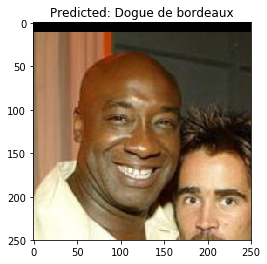

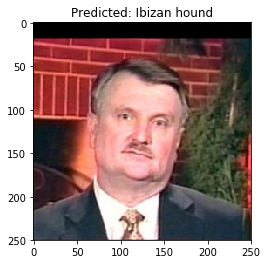

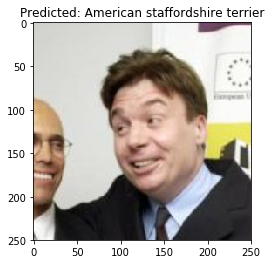

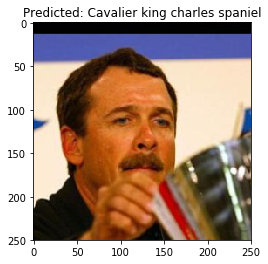

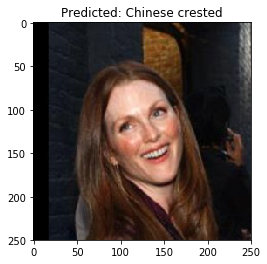

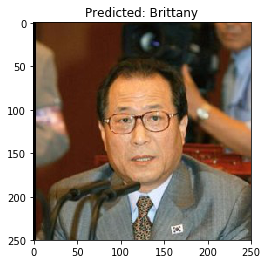

In [38]:
# try out the function
import random
from PIL import Image, ImageFile 

for image in random.sample(list(human_files_short), 6): 
    predicted_breed = predict_breed_transfer(image)
    display_image(image, title="Predicted: {}".format(predicted_breed) )

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [39]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    # checking if image has human faces:
    if (face_detector(img_path)):
        print("Hi! You are a human!")
        
        predicted_breed = predict_breed_transfer(img_path)
        display_image(img_path, title="Predicted: {}".format(predicted_breed) )
        
        print("And you look like a {0}.".format(predicted_breed))
        
    # checking if image has a dog face:
    elif dog_detector(img_path):
        print("Hello Dog!")
        
        predicted_breed = predict_breed_transfer(img_path)
        display_image(img_path, title="Predicted: {}".format(predicted_breed) )
        
        print("This dog breed is most likely {0}.".format(predicted_breed))
    
    # otherwise
    else:
        print("Ups! I couldn't detect any dog or human face in the image. Please use another image.")
        display_image(img_path, title="...")
        
    print("\n")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

I'm testing my algorithm with my pets (Dama and Pepa dogs and "my boy" cat) photos, and also my photos with my girlfriend. And the majiority of them were predicted very well. :) Just the first one the algorithm detected a human face and that's because the little doll in the bottom right.

About improvements:
- Use more epochs for the trainning phase
- Use more images about dogs in order to expand the variety of the dataset
- Change and prove other architectures for my NN

In [40]:
img_list = ["images/photo_{0}.jpeg".format(str(p).zfill(2)) for p in range(1, 10)]

Hi! You are a human!


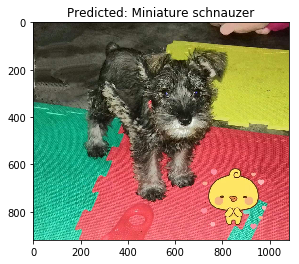

And you look like a Miniature schnauzer.


Hello Dog!


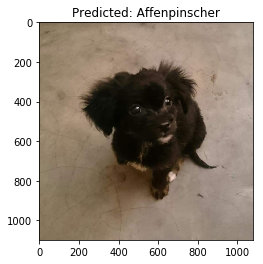

This dog breed is most likely Affenpinscher.


Hello Dog!


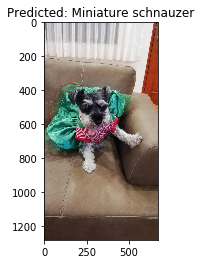

This dog breed is most likely Miniature schnauzer.


Hello Dog!


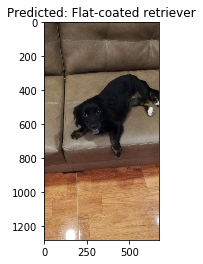

This dog breed is most likely Flat-coated retriever.


Hello Dog!


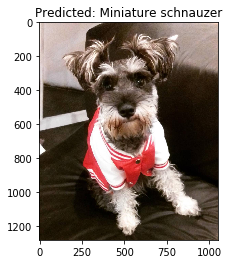

This dog breed is most likely Miniature schnauzer.


Hello Dog!


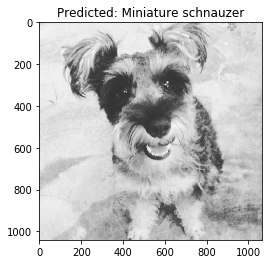

This dog breed is most likely Miniature schnauzer.


Ups! I couldn't detect any dog or human face in the image. Please use another image.


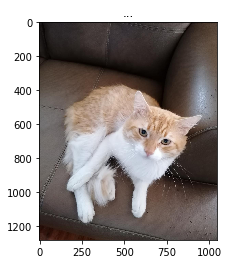



Hi! You are a human!


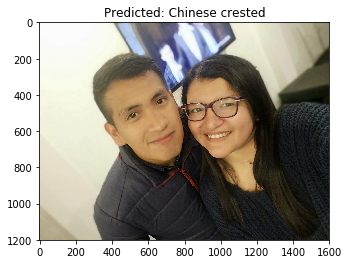

And you look like a Chinese crested.


Hi! You are a human!


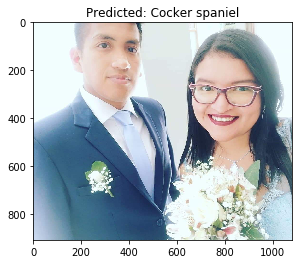

And you look like a Cocker spaniel.




In [41]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack(img_list):
    run_app(file)

It's really important to mention that I guide my solution based on what I've learned on Classes and from other resources like github repos that I'm citing here in order to avoid plagiarism. There were good solutions!

- https://github.com/mjmirza/CNN-Project-Dog-Breed-Classifier-Implementation/blob/master/dog_app.py
- https://github.com/thomasgrusz/dog-breed-classifier/blob/master/dog_app.ipynb